In [1]:
import torch
import numpy as np
import toydiff as tdf
import matplotlib.pyplot as plt

------

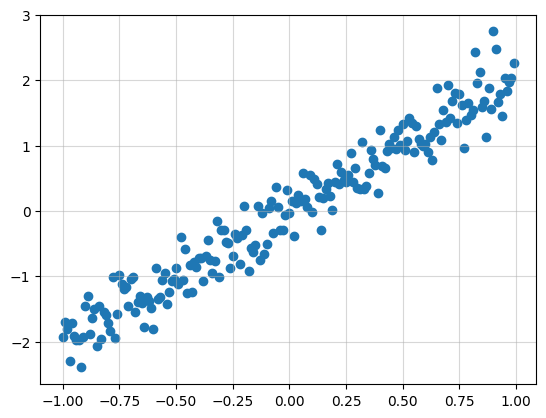

In [2]:
x = np.arange(-1, 1, 0.01).reshape(-1,1)
y = 2 * x + np.random.normal(size=(len(x), 1), scale=0.3)

fig, ax = plt.subplots(1,1)
ax.scatter(x, y)
ax.grid(True, alpha=0.5);

In [3]:
model = tdf.nn.blocks.Linear(1, 1, bias=True)

In [4]:
feat = tdf.Tensor(x, track_gradient=True)
labels = tdf.Tensor(y, track_gradient=True)

In [5]:
from toydiff.nn.optim import SGD
from toydiff.nn.functional import mse_loss

In [6]:
optimizer = SGD(model)

In [7]:
# original prediction
y_0 = model(feat).numpy().copy()

In [8]:
for name, param in model.named_parameters():
    print(name, param)

weight Tensor([[-1.4055386]], dtype=float32, track_gradient=True)
bias Tensor([-0.2773763], dtype=float32, track_gradient=True)


In [9]:
# we want to minimize the sum of squares
losses = []
for i in range(15_000):
    optimizer.zero_grad()

    out = model(feat)
    loss = mse_loss(out, labels)
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.value)

/Users/alejandroperezsanjuan/Git/toydiff/src/toydiff/core.py:590: RuntimeWarning: invalid value encountered in log
  grad_b = (self.power * np.log(data_a)) * grad_np


In [10]:
for name, param in model.named_parameters():
    print(name, param)

weight Tensor([[1.8566722]], dtype=float32, track_gradient=True)
bias Tensor([[-0.06862488]], dtype=float32, track_gradient=True)


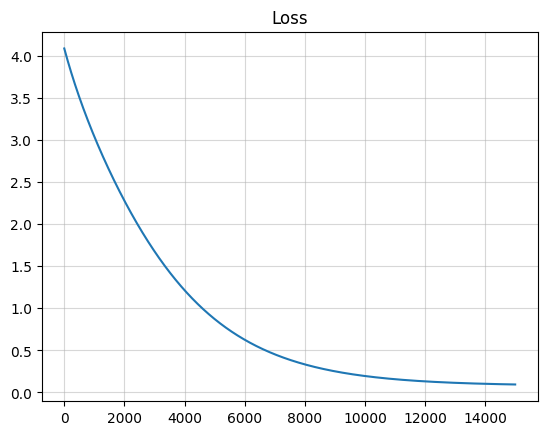

In [11]:
fig, ax = plt.subplots(1,1)

ax.plot(losses)
ax.grid(True, alpha=0.5)
ax.set_title("Loss");

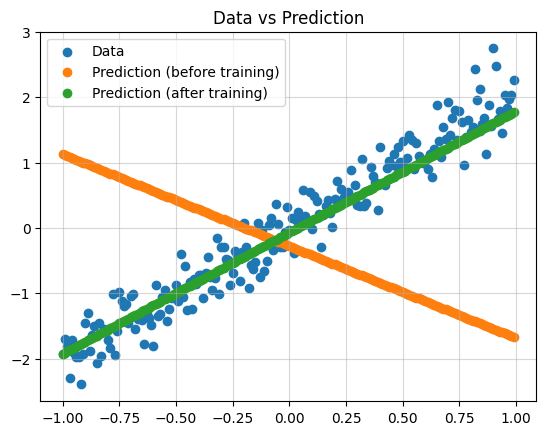

In [12]:
fig, ax = plt.subplots(1,1)

ax.scatter(x, y)
ax.scatter(x, y_0)
ax.scatter(x, out.numpy())

ax.grid(True, alpha=0.5)
ax.legend(["Data", "Prediction (before training)", "Prediction (after training)"])
ax.set_title("Data vs Prediction");

----